# Exercise 4 - Ensemble of Batman trees
## Imports

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import pickle
import os
print("Current working directory:", os.getcwd(), sep="\n")

# So that changes to the a3 model are reflected here.
import a3
import importlib
importlib.reload(a3)
import a3


Current working directory:
/Users/atakancoban/Desktop/School/2dv506 - Machine learning/Assignment 3/supervised-learning-algorithms/Lecture_9


## Functions

In [65]:
def nonce():
    pass

## Part 1 - Prepare datasets

In [3]:
# Load bm.csv.
data = np.loadtxt("datasets/bm.csv", delimiter=',')
np.random.shuffle(data)
X_train, y_train = data[:5000, 0:2], data[:5000, 2]
X_test, y_test = data[5000:, 0:2], data[5000:, 2]

# Bootstrap 100 unique datasets.
rng = np.random.default_rng()

n = 5000
#r = np.zeros([n, 100], dtype=int)  # TODO: Delete if not used
XX = np.zeros([n, 2, 100])
yy = np.zeros([n, 100], dtype=int)

for i in range(100):
    #r[:, i] = rng.choice(n, size=n, replace=True)  # TODO: Delete if not used
    idxs = rng.choice(n, size=n, replace=True)
    XX[:, :, i] = X_train[idxs, :]
    yy[:, i] = y_train[idxs]

## Part 2 - Train model and calculate performance

In [4]:
# Train model.
clfs = []
for i in range(100):
    clfs.append(DecisionTreeClassifier().fit(XX[:,:,i], yy[:,i]))

# Evaluation.
def test_accuracy(X_test, y_test, y_test_pred):
    y_diff = y_test - y_test_pred
    y_diff = (y_diff**2)**0.5
    error_count = np.sum(y_diff)
    return (X_test.shape[0] - error_count) / X_test.shape[0]

# Ensemble accuracy.
y_test_pred = a3.ensemble_predict_binary(clfs, X_test)
accuracy = round(test_accuracy(X_test, y_test, y_test_pred)*100, 2)
print(f"Ensemble accuracy: {accuracy}%")

# Average individual decision tree accuracy.
total = 0
for clf in clfs:
    y_test_pred = clf.predict(X_test)
    total += test_accuracy(X_test, y_test, y_test_pred)
accuracy = round((total/len(clfs))*100, 2)
print(f"Average individual decision tree accuracy: {accuracy}%")

Ensemble accuracy: 97.84%
Average individual decision tree accuracy: 96.7%


## Part 3 - Prepare decision boundaries for individual classifiers

In [33]:
# Prepare meshgrid.
boundaries = []
x_min, x_max, x_step = -9, 9, 0.05
y_min, y_max, y_step = -5, 5, 0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, x_step), np.arange(y_min, y_max, y_step))

# Flatten and collect in one array for vectorized prediction.
X = np.zeros((xx.size, 2))
X[:, 0] = np.ravel(xx)
X[:, 1] = np.ravel(yy)

# Prepare decision boundaries.
print("Calculating for classifier 0-99...")
for plot in range(100):
    if plot % 10 == 0:
        print()
    if plot < 10:
        print("", plot, end=", ")
    else:
        print(plot, end=", ")

    # Predict for each point in meshgrid.
    zz = a3.ensemble_predict_binary(clfs, X)
    zz.reshape(xx.shape)

    # Save boundary points.
    boundaries.append(zz)

print("\n\nDone!")

Calculating for classifier 0-99...

 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 
10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 
30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 
40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 
50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 
60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 
70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 
80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 
90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

Done!


## Part 4 - Plot decision boundaries for individual classifiers

Plotting classifiers 0-99...

 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 
10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 
30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 
40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 
50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 
60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 
70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 
80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 
90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

Done!


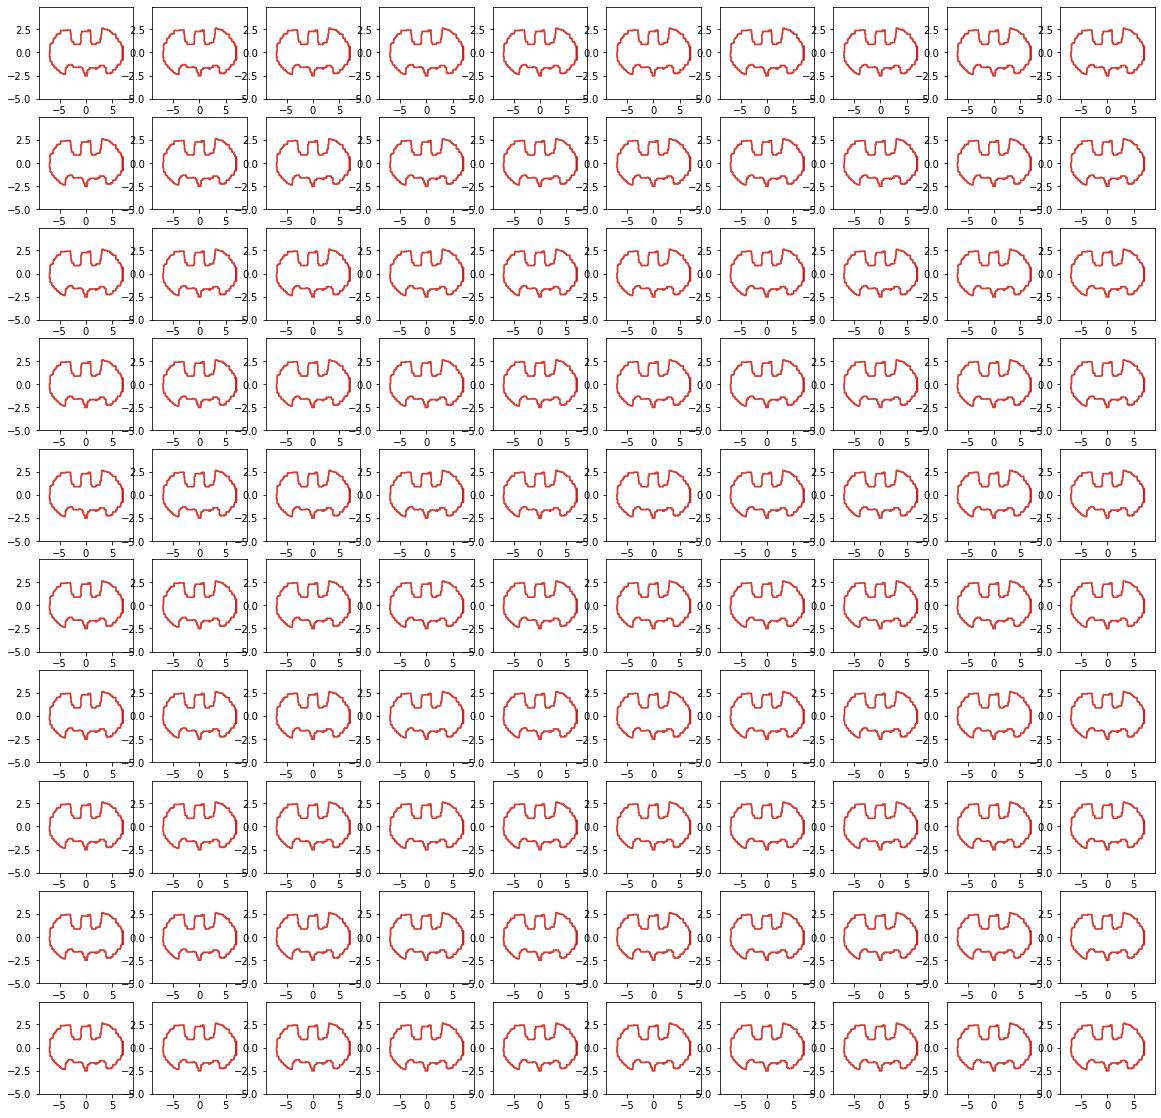

In [30]:
fig = plt.figure(figsize=(20,20))

# Plot for each classifier.
print("Plotting classifiers 0-99...")
for i in range(100):
    if i % 10 == 0:
        print()
    if i < 10:
        print("", i, end=", ")
    else:
        print(i, end=", ")

    zz = boundaries[i]
    ax = fig.add_subplot(10, 10, i+1)
    ax.contour(xx, yy, zz, alpha=0.4, cmap="Reds")

print("\n\nDone!")

## Part 5 - Prepare decision boundaries for the ensemble

In [31]:
# Prepare meshgrid.
x_min, x_max, x_step = -9, 9, 0.05
y_min, y_max, y_step = -5, 5, 0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, x_step), np.arange(y_min, y_max, y_step))

# Flatten and collect in one array for vectorized prediction.
X = np.zeros((xx.size, 2))
X[:, 0] = np.ravel(xx)
X[:, 1] = np.ravel(yy)

# Predict for each point in meshgrid.
zz = a3.ensemble_predict_binary(clfs, X)
zz = zz.reshape(xx.shape)

## Part 6 - Plot decision boundaries for the ensemble

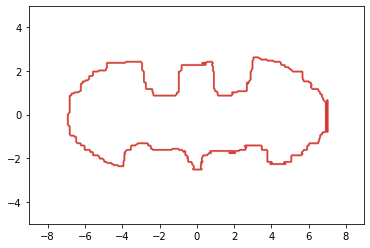

In [32]:
plt.contour(xx, yy, zz, alpha=0.4, cmap="Reds");